# Game of Life

This notebook will demonstrate implementing Conway's game of life using the API. The model will use numpy as a backend for storing the states of the grid of cells, then use slices of the grid to build the computational graph.

*Note: This not the most efficient way to impliment game of life, rather it's a demonstration of how diferent backends can be used to supply inputs to the nodes*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
from functional_abm.schedulers.step_based import StepBasedScheduler
from functional_abm.agent import agent

## Initalize the Array of Cells

In [3]:
ARRAY_SIZE = 100

The array is padded with a border of zeros to allow the size of the state passed as argument to remain consistent across all the agent nodes

In [4]:
foo = np.zeros((ARRAY_SIZE, ARRAY_SIZE))

Active cells are then initialized with random states

In [5]:
foo[1:ARRAY_SIZE-1, 1:ARRAY_SIZE-1] = np.random.randint(0,2, (ARRAY_SIZE-2, ARRAY_SIZE-2))

## Model

As the model only contains one agent type (i.e. the cells in the array) the action at each step is described by a single funtion that updates the state of the cell based on it's previous state, and the state of it's surrounding neighbours.

The model uses a step based scheduler, so all cells are updated each step of the simulation. 

The model stores a copy of the array at each step to show the time development of the cells.

In [6]:
def gol(steps, initial_state):
    
    # Initalize the scheduler and storage 
    # for the history of the array
    scheduler = StepBasedScheduler(steps)
    history = []
    
    # Create the cell agent type, follwing the statndard game of life rules
    # and returning a new event to be run at the next step of the simulation
    @agent(scheduler=scheduler)
    def cell(t, antecedents, state, descendants):
        
        live_neighbours = np.sum(antecedents) - antecedents[1,1]
        
        if live_neighbours < 2:
            new_state = 0
        elif live_neighbours == 2:
            new_state = state[0,0]
        elif live_neighbours == 3:
            new_state = 1
        elif live_neighbours > 3:
            new_state = 0
        
        state[0:1,0:1] = new_state
        
        return t + 1
            
    # Iterate over the array and assign slices of the array as inputs,
    # and the cell managed by an agent as it's input
    for i in range(1, initial_state.shape[0]-1):
        for j in range(1, initial_state.shape[1]-1):
            cell(0, 
                 initial_state[i-1: i+2, j-1: j+2],
                 initial_state[i:i+1, j:j+1],
                 {}
                )
    
    # Run the model for the requested number of steps and 
    # at each step store a copy of the array
    while not scheduler.finished:
        history.append(initial_state.copy())
        scheduler.step()
        
    return history

## Run the Model and Visualize

In [7]:
state_series = gol(10, foo)

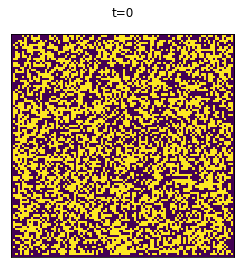

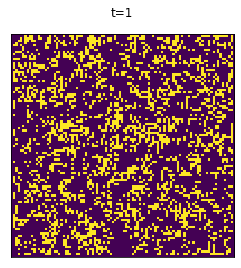

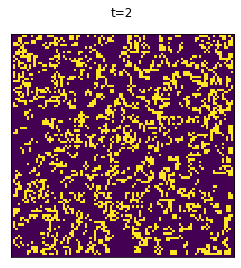

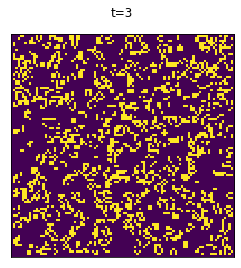

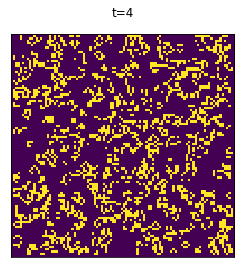

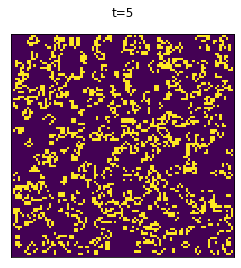

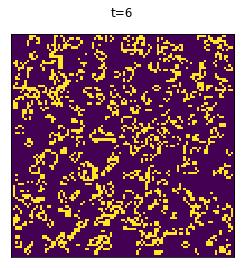

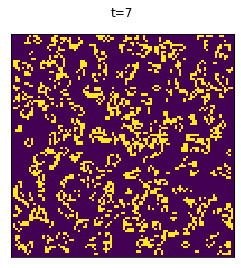

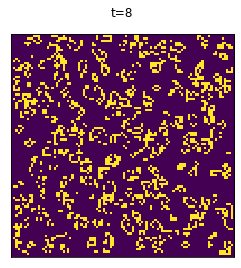

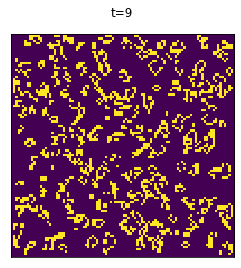

In [8]:
for i in range(len(state_series)):
    plt.matshow(state_series[i])
    plt.title(f"t={i}")
    plt.xticks([], [])
    plt.yticks([], []);